In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# mac 한글 설정
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore') 

# 카테고리 1 정하기
## 1. 데이터 불러오기
- product: 팔린 데이터
- items: 아이템 내역
- custom: 고객

In [6]:
product = pd.read_csv('./data/제5회 Big Data Competition-분석용데이터-01.Pruduct.csv')
items = pd.read_csv('./data/제5회 Big Data Competition-분석용데이터-06.Master.csv')
custom = pd.read_csv('./data/제5회 Big Data Competition-분석용데이터-04.Custom.csv')
print(product.shape, items.shape, custom.shape)

(5024906, 8) (847652, 5) (671679, 3)


## 2. 데이터 살펴보기
### 2-1. items
존재하는 items의 수

Text(0.5, 1.0, '카테고리1의 아이템 수')

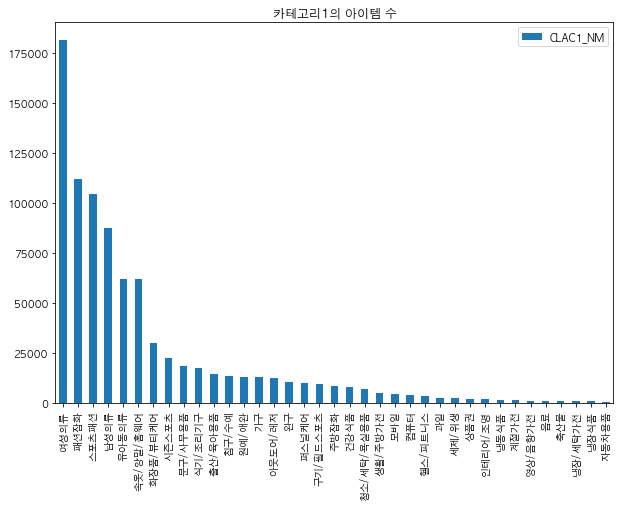

In [7]:
pd.DataFrame(items['CLAC1_NM'].value_counts()).plot.bar(figsize=(10, 7))
plt.title('카테고리1의 아이템 수')

### 2-2. custom의 성별, 연령대
30, 40대 여성이 많기 때문에 아동 카테고리 고려

Text(0.5, 1.0, '연령대에 따른 성별 분포')

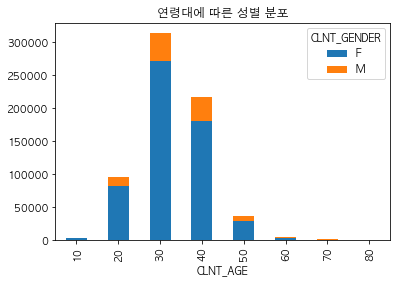

In [9]:
c = custom.groupby( ['CLNT_AGE', 'CLNT_GENDER']).count().unstack()
c.columns = c.columns.droplevel()
c.plot.bar(stacked=True)
plt.title('연령대에 따른 성별 분포')

## 3. items의 큰 카테고리 정하기
- feat.product(팔린 내역)를 이용하여 (6개월간 팔린 아이템을 위주로 라벨링)

### 3-1. items의 카테고리별 아이템 살펴보기

#### items_cnt(cate, name): return df
카테고리 안의 item 수 확인

In [22]:
def items_cnt(cate, name):
    return items[items[cate]==name].groupby(['CLAC1_NM', 'CLAC2_NM']).count()[['PD_C']].rename({'PD_C': 'count'}, axis=1)

### 침구/수예의 경우에는 성인침구, 수예소품, 유아동침구가 존재했기 때문에 유아동침구는 따로 유아동 침구로 라벨 분리

In [23]:
items_cnt('CLAC1_NM', '침구/수예')

count
CLAC1_NM CLAC2_NM       
침구/수예    성인침구       9067
         수예소품       2728
         유아동침구      1673

In [25]:
items.loc[items[items['CLAC2_NM']=='유아동침구'].index, 'CLAC1_NM'] = '유아동침구'

### 3-2. 팔린 아이템 위주로 살펴보기

In [27]:
sales = pd.merge(product, items, on='PD_C')
print(sales.shape)

(5024906, 12)


In [33]:
cate = sales.groupby(['CLAC1_NM']).count()[['CLNT_ID']].reset_index().rename({'CLNT_ID':'count'}, axis=1)
print('총 {}개의 큰 카테고리로 되어있음'.format(len(cate['CLAC1_NM'])))

총 38개의 큰 카테고리로 되어있음


Text(0.5, 1.0, 'CLAC1_NM기준: 팔린 내역 수')

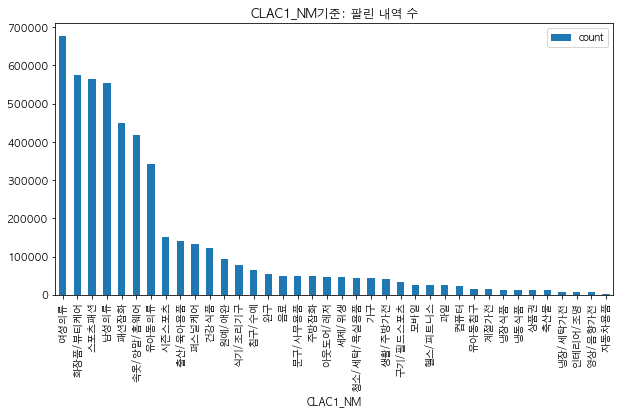

In [37]:
cate.sort_values('count', ascending=False).set_index('CLAC1_NM').plot.bar(figsize=(10, 5))
plt.title('CLAC1_NM기준: 팔린 내역 수')

#### sales_cnt(CLAC1_NM): return df
카테고리 안의 거래내역 수 확인

In [44]:
def sales_cnt(name): 
    return sales[sales['CLAC1_NM']==name].groupby(['CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM']).count()[['CLNT_ID']].rename(
    {'CLNT_ID': 'count'}, axis=1)

In [45]:
sales_cnt('모바일')

count
CLAC1_NM CLAC2_NM CLAC3_NM         
모바일      모바일기기    기타모바일기기       725
                  휴대폰           744
         모바일액세서리  기타모바일액세서리   13413
                  모바일배터리/충전기   1713
                  이어폰/헤드폰      5179
                  케이스/보호필름     4296

### 3-3. 임의로 우리끼리 정한 큰 라벨 분류
하우스, 건강, 전자기기, 식품, 스포츠, 의류, 기타, 아동, 건강, 뷰티

In [49]:
category1 = ['하우스', '건강', '전자기기', '식품', '스포츠', '의류', '식품', '전자기기', 
             '식품', '전자기기', '기타', '기타', '전자기기', '하우스', '의류', 
             '스포츠', '스포츠', '하우스', '아동', '스포츠', '의류', '전자기기', 
             '아동',  '기타', '아동', '식품', '하우스', '기타', '하우스', 
             '하우스',  '식품', '아동', '하우스', '전자기기', '의류', 
             '건강', '건강', '뷰티']

print('{}에서 {}개로'.format(len(items['CLAC1_NM'].unique()), len(set(category1))))

38에서 9개로


Text(0.5, 1.0, 'category1을 적용한 거래내역 수 확인')

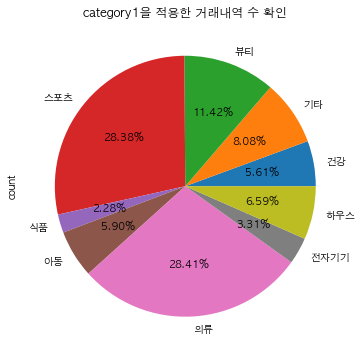

In [53]:
cate['cate1'] = category1
cate.groupby(['cate1']).sum().plot.pie(subplots=True, autopct='%.2f%%', figsize=(6, 6), legend=False)
plt.title('category1을 적용한 거래내역 수 확인')

In [56]:
cate.groupby(['cate1']).sum().T

cate1,건강,기타,뷰티,스포츠,식품,아동,의류,전자기기,하우스
count,282044,406014,574033,1425877,114790,296712,1427770,166360,331306
